In [2]:
# Race and Ethnicity (Alex):\
# Total number of cases in each ethnicity, pie chart\
# then look at percentage of each of those groups that died\

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = pd.read_csv('data/clean_data.csv')
file

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,1.0,2,0.461779,0.004861
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,0.0,2,0.461779,0.004861
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,0.0,2,0.461779,0.004861
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,0.0,2,0.461779,0.004861


In [10]:
dates = file[['month','Race and ethnicity (combined)',"death_yn"]]
dates

,month,Race and ethnicity (combined),death_yn
0,11,Black,0.0
1,11,Black,0.0
2,11,Black,0.0
3,11,Black,0.0
4,11,Black,0.0
...,...,...,...
457726,2,Hispanic,0.0
457727,2,Hispanic,0.0
457728,2,Hispanic,0.0
457729,2,White,0.0


In [13]:
deaths = dates.groupby(dates["month"]).sum()
deaths

,death_yn
month,
1,0.0
2,16.0
3,2925.0
4,5574.0
5,3374.0
6,8381.0
7,2524.0
8,2057.0
9,1395.0


In [14]:
ethnicity = dates.groupby([dates['month'],dates['Race and ethnicity (combined)']]).sum()
ethnic_story = dates.groupby([dates['month'],dates['Race and ethnicity (combined)']]).count()
ethnic_story = ethnic_story.unstack()
ethnicity = ethnicity.unstack()
ethnicity

death_yn                                 \
Race and ethnicity (combined)    Asian   Black Hispanic Native  Other   
month                                                                   
1                                  0.0     0.0      0.0    NaN    NaN   
2                                  0.0     6.0      4.0    NaN    0.0   
3                                195.0   781.0    759.0    3.0  147.0   
4                                235.0  1133.0   1067.0   12.0  295.0   
5                                123.0   598.0    333.0   35.0  117.0   
6                                466.0  1894.0   1642.0   23.0  117.0   
7                                 99.0   626.0    399.0   25.0   49.0   
8                                 50.0   321.0    189.0   15.0   33.0   
9                                 37.0   188.0    113.0   15.0   24.0   
10                                34.0   200.0    103.0   18.0   42.0   
11                                13.0    95.0     62.0    4.0   36.0   

                                                        
Race and ethnicity (combined) Pacific Islander   White  
month                                                   
1                                          NaN     0.0  
2                                          NaN     6.0  
3                                          6.0  1034.0  
4                                         12.0  2820.0  
5                                         26.0  2142.0  
6                                         23.0  4216.0  
7                                         16.0  1310.0  
8                                         13.0  1436.0  
9                                          8.0  1010.0  
10                                         4.0  1499.0  
11                                         3.0   810.0

In [19]:
pie_chart = file.groupby("Race and ethnicity (combined)")["death_yn"].sum()
pie_chart

Race and ethnicity (combined)
Asian                1252.0
Black                5842.0
Hispanic             4671.0
Native                150.0
Other                 860.0
Pacific Islander      111.0
White               16283.0
Name: death_yn, dtype: float64

ValueError: could not convert string to float: 'Asian'

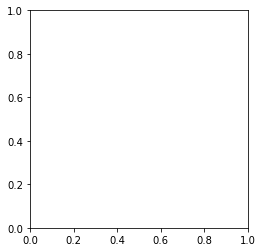

In [21]:
plt.pie(pie_chart.index,pie_chart[1])